<a href="https://colab.research.google.com/github/rmclino/pytorch/blob/master/PytorchLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
plt.style.use('seaborn')
%matplotlib inline

Text(0.5, 0, 'x')

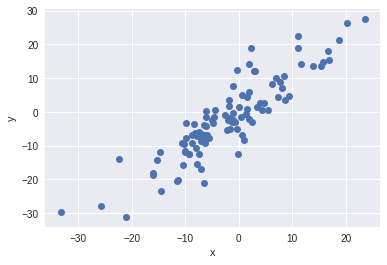

In [0]:
torch.manual_seed(1)

X = torch.randn(100,1)*10
y = X+ 5*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  
  def __init__(self, input_size, out_putsize):     # Constructor in Python
    super().__init__()
    self.linear = nn.Linear(input_size, out_putsize)
   
  def forward(self, x):
    #pred = w*x+b
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = nn.Linear(1,1)
model = LR(1,1)
print(model)


LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'b')
  plt.scatter(X, y,color='r')
  plt.show()

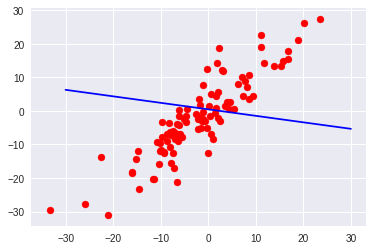

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.01 )
optimizer = torch.optim.ASGD(model.parameters(), lr = 0.01 )

In [0]:
epochs = 200
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred.cuda(),y.cuda())
  print('epoch:',i,' loss:',loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

epoch: 0  loss: 191.9585418701172
epoch: 1  loss: 184.9203338623047
epoch: 2  loss: 178.18386840820312
epoch: 3  loss: 171.73521423339844
epoch: 4  loss: 165.56289672851562
epoch: 5  loss: 159.65438842773438
epoch: 6  loss: 153.99920654296875
epoch: 7  loss: 148.58551025390625
epoch: 8  loss: 143.4041748046875
epoch: 9  loss: 138.44419860839844
epoch: 10  loss: 133.6968231201172
epoch: 11  loss: 129.15243530273438
epoch: 12  loss: 124.80311584472656
epoch: 13  loss: 120.63953399658203
epoch: 14  loss: 116.65463256835938
epoch: 15  loss: 112.83991241455078
epoch: 16  loss: 109.18907165527344
epoch: 17  loss: 105.69418334960938
epoch: 18  loss: 102.34927368164062
epoch: 19  loss: 99.14730834960938
epoch: 20  loss: 96.08293914794922
epoch: 21  loss: 93.14948272705078
epoch: 22  loss: 90.342041015625
epoch: 23  loss: 87.65460205078125
epoch: 24  loss: 85.0826187133789
epoch: 25  loss: 82.62051391601562
epoch: 26  loss: 80.26428985595703
epoch: 27  loss: 78.00879669189453
epoch: 28  loss: 7

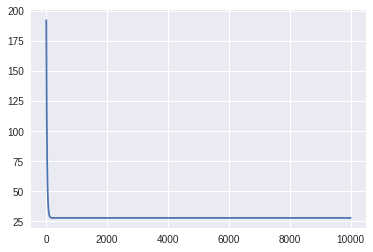

In [0]:
plt.plot(range(epochs),losses)

In [0]:
get_params()

(1.0887659788131714, 0.1830880492925644)

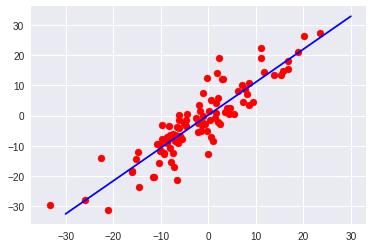

In [0]:
plot_fit("Treined Model")

In [0]:
print(loss.item())

27.725502014160156


In [0]:
if torch.cuda.is_available():
    model.cuda()

In [0]:
torch.cuda.is_available()

True

In [0]:
use_cuda = True